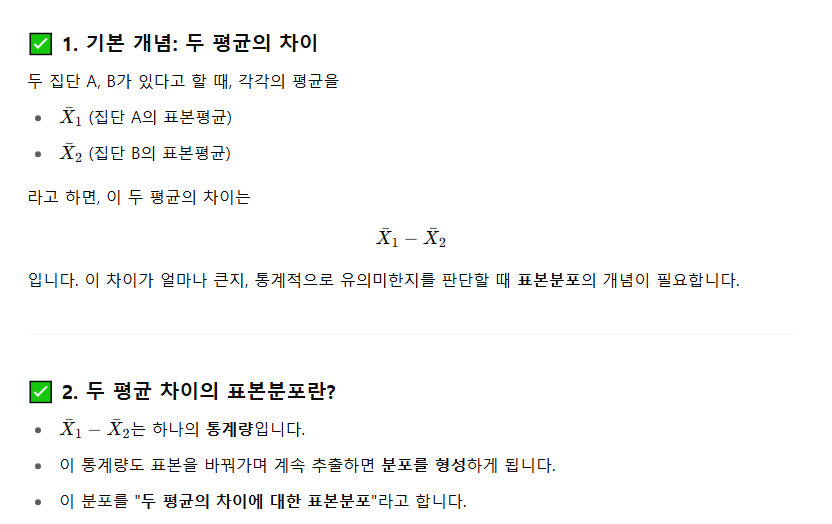

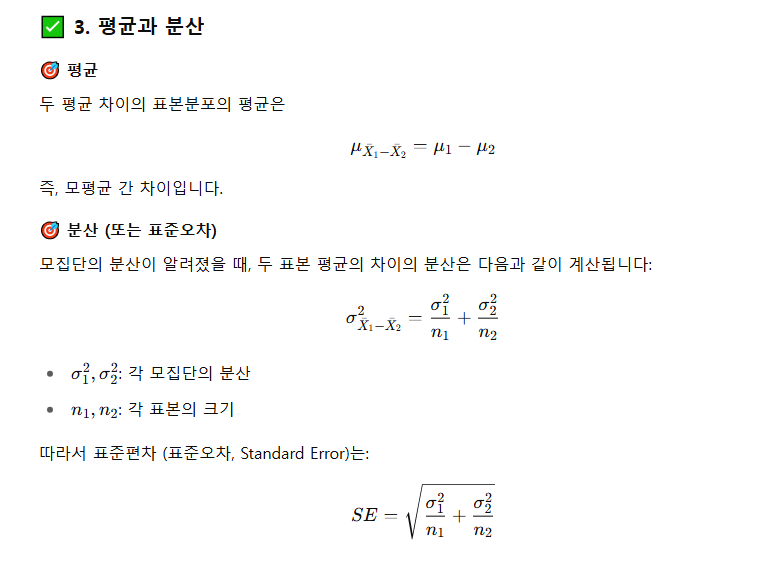

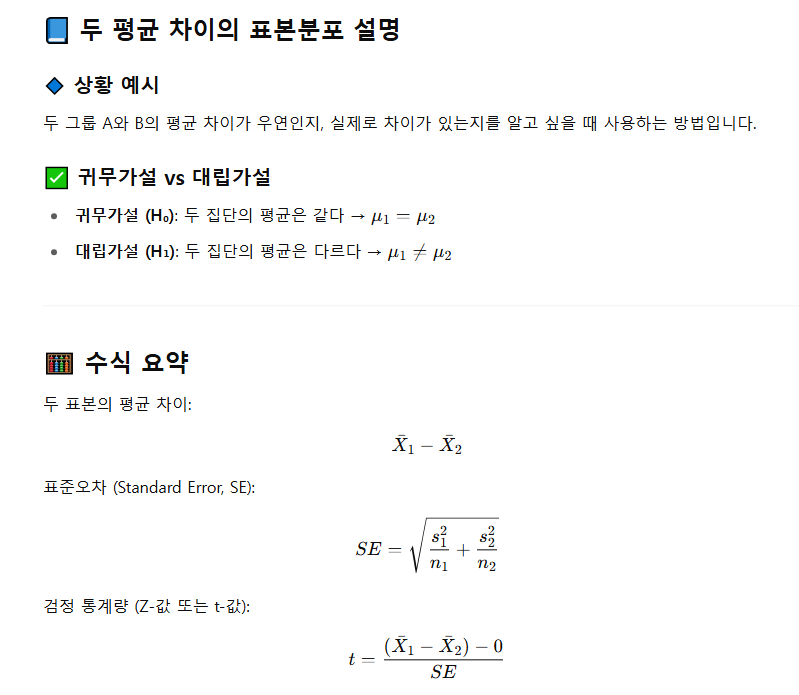

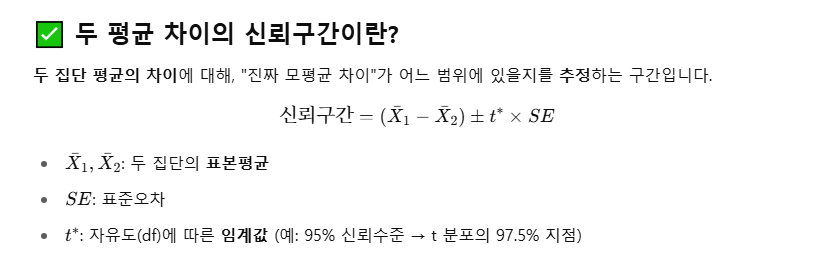

In [ ]:
# V(X - Y) = V(X) + V(Y)
# 신뢰구간 = (mu_x - mu_y) +- sqrt(Var(X - Y))
# 모분산이 알려져있다면, 정규분포를 따름.
# 표본의 크기가 작으면 t-분포 이용

In [3]:
import numpy as np
from scipy import stats

# 그룹 A
mean1 = 6.2
std1 = 1.2
n1 = 30

# 그룹 B
mean2 = 5.8
std2 = 1.0
n2 = 40

# 평균 차이
mean_diff = mean1 - mean2

# 표준오차(SE)
se = np.sqrt((std1**2)/n1 + (std2**2)/n2)

# 자유도 (Welch's t-test 방식)
df_num = ((std1**2)/n1 + (std2**2)/n2)**2
df_denom = ((std1**2/n1)**2) / (n1 - 1) + ((std2**2/n2)**2) / (n2 - 1)
df = df_num / df_denom

# 신뢰수준 설정 (예: 95%)
confidence = 0.95
alpha = 1 - confidence

# t* 임계값
t_critical = stats.t.ppf(1 - alpha/2, df)

# 신뢰구간 계산
ci_low = mean_diff - t_critical * se
ci_high = mean_diff + t_critical * se

print(f"평균 차이: {mean_diff:.2f}")
print(f"표준오차(SE): {se:.4f}")
print(f"자유도: {df:.2f}")
print(f"{int(confidence*100)}% 신뢰구간: ({ci_low:.4f}, {ci_high:.4f})")

# 해석
if ci_low > 0 or ci_high < 0:
    print("✅ 평균 차이에 대한 신뢰구간이 0을 포함하지 않음 → 통계적으로 유의함.")
else:
    print("❌ 신뢰구간에 0이 포함됨 → 통계적으로 유의하지 않음.")


평균 차이: 0.40
표준오차(SE): 0.2702
자유도: 55.82
95% 신뢰구간: (-0.1413, 0.9413)
❌ 신뢰구간에 0이 포함됨 → 통계적으로 유의하지 않음.


In [5]:
# 데이터 샘플 직접 비교할 경우
sample1 = np.random.normal(loc=6.2, scale=1.2, size=30)
sample2 = np.random.normal(loc=5.8, scale=1.0, size=40)

t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)

print(f"t 통계량: {t_stat:.4f}, p-value: {p_value:.4f}")


t 통계량: 1.7356, p-value: 0.0890
